In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
games = pd.read_csv("data.csv", header=None)
games.head()

,0,1,2,3,4
0,15,66,237,0,Strategy
1,21,60,238,0,Platformer
2,14,78,176,1,Strategy
3,10,67,216,1,Strategy
4,19,69,185,1,RPG


In [4]:
games.columns = ["Age", "Height", "Weight", "Gender", "Genre"]
games.head()

,Age,Height,Weight,Gender,Genre
0,15,66,237,0,Strategy
1,21,60,238,0,Platformer
2,14,78,176,1,Strategy
3,10,67,216,1,Strategy
4,19,69,185,1,RPG


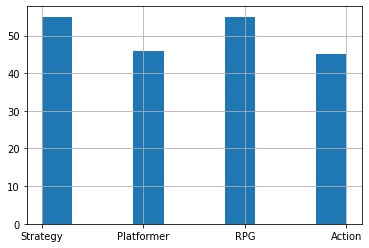

In [8]:
games["Genre"].hist()
plt.show()

In [9]:
X = games.iloc[:,:-1].values
y = games.iloc[:,4].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [17]:
X_train.shape

(160, 4)

In [18]:
X_test.shape

(41, 4)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train[:10]

array([[-0.47662817, -0.22673659, -1.49735828, -0.92761259],
       [ 0.93560344,  0.79039951,  1.13746108, -0.92761259],
       [-0.69389457,  0.90341464,  0.86123002, -0.92761259],
       [-1.67159338, -1.13085757,  0.33001644,  1.07803625],
       [-0.58526137,  0.2253239 , -1.58235246, -0.92761259],
       [ 0.60970384, -1.58291806,  0.66999313, -0.92761259],
       [ 1.26150305, -0.33975171,  0.86123002,  1.07803625],
       [-0.91116097,  0.33833902,  1.2437038 , -0.92761259],
       [ 0.82697024,  0.33833902,  1.47743777, -0.92761259],
       [-0.58526137, -1.58291806, -0.09495443,  1.07803625]])

In [33]:
classifier = KNeighborsClassifier(n_neighbors=7                                  )
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
y_pred = classifier.predict(X_test)


/Users/david/.virtualenvs/CSC525_Module2_CriticalThinking_Option2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 2 4 0]
 [4 1 2 2]
 [2 5 1 3]
 [3 2 5 3]]
              precision    recall  f1-score   support

      Action       0.18      0.25      0.21         8
  Platformer       0.10      0.11      0.11         9
         RPG       0.08      0.09      0.09        11
    Strategy       0.38      0.23      0.29        13

    accuracy                           0.17        41
   macro avg       0.19      0.17      0.17        41
weighted avg       0.20      0.17      0.18        41

